In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import datetime
from datetime import date, timedelta
import matplotlib.pyplot as plt
%matplotlib inline
from autots import AutoTS

today = date.today()

In [3]:
d1 = today.strftime("%Y-%m-%d")
end_date = d1
d2 = date.today() - timedelta(days=730)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2

data = yf.download('XRP-USD', 
                      start=start_date, 
                      end=end_date, 
                      progress=False)
data["Date"] = data.index
data = data[["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume"]]
data.reset_index(drop=True, inplace=True)
#print(data.head())
data.tail(10)


,Date,Open,High,Low,Close,Adj Close,Volume
721,2022-03-27,0.832815,0.857376,0.830339,0.857343,0.857343,1505124770
722,2022-03-28,0.857408,0.908086,0.855211,0.863304,0.863304,3205464277
723,2022-03-29,0.863089,0.884441,0.848861,0.858000,0.858000,2120020042
724,2022-03-30,0.857942,0.871279,0.849425,0.860814,0.860814,1832671641
725,2022-03-31,0.860880,0.870866,0.803881,0.814564,0.814564,2611691934
726,2022-04-01,0.814709,0.833678,0.810256,0.827740,0.827740,2091887103
727,2022-04-02,0.827735,0.848600,0.824828,0.824919,0.824919,1624227101
728,2022-04-03,0.824891,0.850154,0.817265,0.842950,0.842950,1348476817
729,2022-04-04,0.842923,0.842952,0.810890,0.827251,0.827251,1876069127
730,2022-04-05,0.827935,0.833054,0.819709,0.825108,0.825108,1625709056


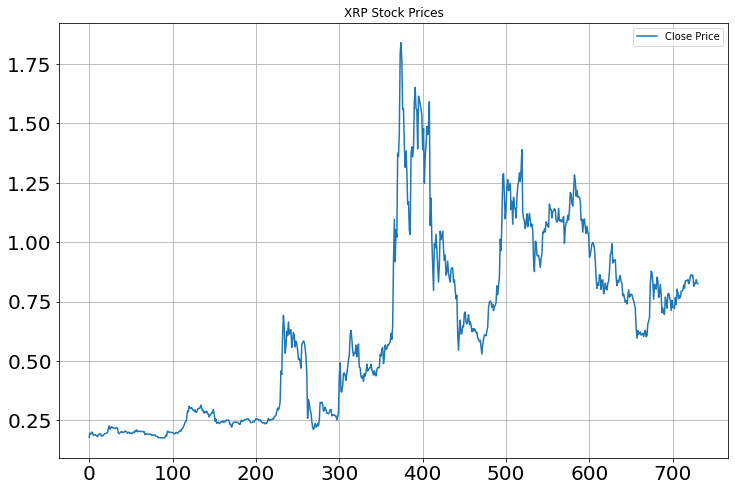

/opt/anaconda3/envs/dev/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/opt/anaconda3/envs/dev/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/opt/anaconda3/envs/dev/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/opt/anaconda3/envs/dev/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/opt/anaconda3/envs/dev/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [8]:
data = data[["Date", "Close"]]
data["Date"] = pd.to_datetime(data.Date)
data["Close"].plot(figsize=(12, 8), title="XRP Stock Prices", fontsize=20, label="Close Price")
plt.legend()
plt.grid()
plt.show()

In [5]:
model = AutoTS(forecast_length=10, frequency='infer', 
               ensemble='simple', drop_data_older_than_periods=200)
model = model.fit(data, date_col='Date', value_col='Close', id_col=None)

Inferred frequency is: D
Old data dropped by `drop_data_older_than_periods`.
Model Number: 1 with model AverageValueNaive in generation 0 of 10
Model Number: 2 with model AverageValueNaive in generation 0 of 10
Model Number: 3 with model AverageValueNaive in generation 0 of 10
Model Number: 4 with model DatepartRegression in generation 0 of 10
Model Number: 5 with model DatepartRegression in generation 0 of 10
Model Number: 6 with model DatepartRegression in generation 0 of 10


/opt/anaconda3/envs/dev/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Model Number: 7 with model DatepartRegression in generation 0 of 10
Template Eval Error: ImportError('Tensorflow not available, install with pip install tensorflow.') in model 7: DatepartRegression
Model Number: 8 with model ETS in generation 0 of 10
Model Number: 9 with model ETS in generation 0 of 10


/opt/anaconda3/envs/dev/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 10 with model GLM in generation 0 of 10
Template Eval Error: TypeError("ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''") in model 10: GLM
Model Number: 11 with model GLM in generation 0 of 10
Model Number: 12 with model GLS in generation 0 of 10
Model Number: 13 with model GLS in generation 0 of 10
Model Number: 14 with model GluonTS in generation 0 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 14: GluonTS
Model Number: 15 with model GluonTS in generation 0 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 15: GluonTS
Model Number: 16 with model GluonTS in generation 0 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 

/opt/anaconda3/envs/dev/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 43 with model GLS in generation 0 of 10
Model Number: 44 with model SeasonalNaive in generation 0 of 10
Model Number: 45 with model GLM in generation 0 of 10
Template Eval Error: TypeError("ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''") in model 45: GLM
Model Number: 46 with model ETS in generation 0 of 10
Model Number: 47 with model FBProphet in generation 0 of 10
Template Eval Error: ModuleNotFoundError("No module named 'prophet'") in model 47: FBProphet
Model Number: 48 with model GluonTS in generation 0 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 48: GluonTS
Model Number: 49 with model UnobservedComponents in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 49: UnobservedComponents
Model Number: 50 with

/opt/anaconda3/envs/dev/lib/python3.7/site-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/anaconda3/envs/dev/lib/python3.7/site-packages/sklearn/utils/extmath.py:986: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/opt/anaconda3/envs/dev/lib/python3.7/site-packages/sklearn/utils/extmath.py:991: RuntimeWarning: invalid value encountered in true_divide
  T = new_sum / new_sample_count
/opt/anaconda3/envs/dev/lib/python3.7/site-packages/sklearn/utils/extmath.py:1021: RuntimeWarning: invalid value encountered in true_divide
  new_unnormalized_variance -= correction ** 2 / new_sample_count
/opt/anaconda3/envs/dev/lib/python3.7/site-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feat

Model Number: 67 with model GLM in generation 0 of 10
Template Eval Error: TypeError("ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''") in model 67: GLM
Model Number: 68 with model LastValueNaive in generation 0 of 10
Model Number: 69 with model SectionalMotif in generation 0 of 10
Model Number: 70 with model VECM in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 70: VECM
Model Number: 71 with model VECM in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 71: VECM
Model Number: 72 with model MultivariateMotif in generation 0 of 10
Model Number: 73 with model GLS in generation 0 of 10
Model Number: 74 with model MultivariateMotif in generation 0 of 10
Model Number: 75 with model DatepartRegression in generation 0 of 10
Template Eval Error: ImportError('Tensorflow n

/opt/anaconda3/envs/dev/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1390: RuntimeWarning: All-NaN slice encountered
  overwrite_input, interpolation)


Model Number: 158 with model MultivariateRegression in generation 1 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 158: MultivariateRegression
Model Number: 159 with model Theta in generation 1 of 10
Model Number: 160 with model Theta in generation 1 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.44918D+00    |proj g|=  2.28679D+00

At iterate    5    f= -1.45297D+00    |proj g|=  1.81101D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  S

 This problem is unconstrained.


Model Number: 162 with model Theta in generation 1 of 10
Model Number: 163 with model UnivariateMotif in generation 1 of 10
Model Number: 164 with model UnivariateMotif in generation 1 of 10
Model Number: 165 with model UnivariateMotif in generation 1 of 10
Model Number: 166 with model UnivariateMotif in generation 1 of 10
Model Number: 167 with model SectionalMotif in generation 1 of 10
Model Number: 168 with model SectionalMotif in generation 1 of 10
Model Number: 169 with model SectionalMotif in generation 1 of 10
Model Number: 170 with model SectionalMotif in generation 1 of 10
Model Number: 171 with model ZeroesNaive in generation 1 of 10
Model Number: 172 with model ZeroesNaive in generation 1 of 10
Model Number: 173 with model ZeroesNaive in generation 1 of 10
Model Number: 174 with model UnobservedComponents in generation 1 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 174: UnobservedComponents
Model Number: 175 with m

/opt/anaconda3/envs/dev/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 204: GluonTS
Model Number: 205 with model GluonTS in generation 1 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 205: GluonTS
Model Number: 206 with model VAR in generation 1 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 206: VAR
Model Number: 207 with model VAR in generation 1 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 207: VAR
Model Number: 208 with model VAR in generation 1 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 208: VAR
Model Number: 209 with model VAR in generation 1 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 209: VAR
Model Number: 210 with model VECM in generation 1 of 10
Template Eval Error: ValueError('Only gave one variable

/opt/anaconda3/envs/dev/lib/python3.7/site-packages/statsmodels/genmod/generalized_linear_model.py:296: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  DomainWarning)


Model Number: 278 with model DatepartRegression in generation 2 of 10
Model Number: 279 with model GluonTS in generation 2 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 279: GluonTS
Model Number: 280 with model GluonTS in generation 2 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 280: GluonTS
Model Number: 281 with model GluonTS in generation 2 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 281: GluonTS
Model Number: 282 with model GluonTS in generation 2 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 282: GluonTS
Model Number: 283 with model VAR in generation 2 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 283: VAR


 This problem is unconstrained.


Model Number: 316 with model ETS in generation 3 of 10
Model Number: 317 with model ETS in generation 3 of 10
Model Number: 318 with model ETS in generation 3 of 10
Model Number: 319 with model ETS in generation 3 of 10
Model Number: 320 with model MultivariateRegression in generation 3 of 10
Model Number: 321 with model MultivariateRegression in generation 3 of 10
Template Eval Error: ValueError("Input contains NaN, infinity or a value too large for dtype('float32').") in model 321: MultivariateRegression
Model Number: 322 with model MultivariateRegression in generation 3 of 10


/opt/anaconda3/envs/dev/lib/python3.7/site-packages/numpy/lib/function_base.py:2634: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/opt/anaconda3/envs/dev/lib/python3.7/site-packages/numpy/lib/function_base.py:2634: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Template Eval Error: ValueError("Input contains NaN, infinity or a value too large for dtype('float32').") in model 322: MultivariateRegression
Model Number: 323 with model MultivariateRegression in generation 3 of 10
Model Number: 324 with model UnobservedComponents in generation 3 of 10
Model Number: 325 with model UnobservedComponents in generation 3 of 10
Model Number: 326 with model UnobservedComponents in generation 3 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 326: UnobservedComponents
Model Number: 327 with model UnivariateMotif in generation 3 of 10
Model Number: 328 with model UnivariateMotif in generation 3 of 10
Model Number: 329 with model UnivariateMotif in generation 3 of 10
Model Number: 330 with model UnivariateMotif in generation 3 of 10
Model Number: 331 with model WindowRegression in generation 3 of 10
Template Eval Error: ValueError('Found array with 0 sample(s) (shape=(0, 0)) while a minimum of 1 is req

/opt/anaconda3/envs/dev/lib/python3.7/site-packages/statsmodels/genmod/generalized_linear_model.py:296: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  DomainWarning)
/opt/anaconda3/envs/dev/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Model Number: 354 with model DatepartRegression in generation 3 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 354: DatepartRegression
Model Number: 355 with model DatepartRegression in generation 3 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 355: DatepartRegression
Model Number: 356 with model GluonTS in generation 3 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 356: GluonTS
Model Number: 357 with model GluonTS in generation 3 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 357: GluonTS
Model Number: 358 with model GluonTS in generation 3 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 358: GluonTS
Model Number: 359 with

/opt/anaconda3/envs/dev/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1390: RuntimeWarning: All-NaN slice encountered
  overwrite_input, interpolation)


Template Eval Error: ModuleNotFoundError("No module named 'prophet'") in model 371: FBProphet
Model Number: 372 with model ARDL in generation 3 of 10
Template Eval Error: ImportError("cannot import name 'ARDL' from 'statsmodels.tsa.api' (/opt/anaconda3/envs/dev/lib/python3.7/site-packages/statsmodels/tsa/api.py)") in model 372: ARDL
Model Number: 373 with model ARDL in generation 3 of 10
Template Eval Error: ImportError("cannot import name 'ARDL' from 'statsmodels.tsa.api' (/opt/anaconda3/envs/dev/lib/python3.7/site-packages/statsmodels/tsa/api.py)") in model 373: ARDL
Model Number: 374 with model ARDL in generation 3 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 374: ARDL
Model Number: 375 with model ARDL in generation 3 of 10
Template Eval Error: ImportError("cannot import name 'ARDL' from 'statsmodels.tsa.api' (/opt/anaconda3/envs/dev/lib/python3.7/site-packages/statsmodels/tsa/api.py)") in model 375: ARDL
New Generation: 4 of 10
Model Number: 37

 This problem is unconstrained.


Model Number: 389 with model Theta in generation 4 of 10
Model Number: 390 with model Theta in generation 4 of 10
Model Number: 391 with model UnivariateMotif in generation 4 of 10
Model Number: 392 with model UnivariateMotif in generation 4 of 10
Model Number: 393 with model UnivariateMotif in generation 4 of 10
Model Number: 394 with model UnivariateMotif in generation 4 of 10
Model Number: 395 with model ETS in generation 4 of 10
ETS error ValueError('Can only dampen the trend component')
ETS failed on Close with ValueError('Can only dampen the trend component')
Model Number: 396 with model ETS in generation 4 of 10
Model Number: 397 with model ETS in generation 4 of 10
Model Number: 398 with model ETS in generation 4 of 10
Model Number: 399 with model MultivariateRegression in generation 4 of 10
Model Number: 400 with model MultivariateRegression in generation 4 of 10
Model Number: 401 with model MultivariateRegression in generation 4 of 10
Template Eval Error: ModuleNotFoundError(

/opt/anaconda3/envs/dev/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Model Number: 411 with model SectionalMotif in generation 4 of 10
Model Number: 412 with model SectionalMotif in generation 4 of 10
Model Number: 413 with model GLS in generation 4 of 10
Model Number: 414 with model GLS in generation 4 of 10
Model Number: 415 with model SeasonalNaive in generation 4 of 10
Model Number: 416 with model SeasonalNaive in generation 4 of 10
Model Number: 417 with model SeasonalNaive in generation 4 of 10
Model Number: 418 with model SeasonalNaive in generation 4 of 10
Model Number: 419 with model MultivariateMotif in generation 4 of 10
Model Number: 420 with model MultivariateMotif in generation 4 of 10
Model Number: 421 with model MultivariateMotif in generation 4 of 10
Model Number: 422 with model MultivariateMotif in generation 4 of 10
Model Number: 423 with model GLM in generation 4 of 10
Model Number: 424 with model GLM in generation 4 of 10
Model Number: 425 with model GLM in generation 4 of 10
Template Eval Error: ValueError('regression_type=user and

/opt/anaconda3/envs/dev/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Model Number: 462 with model AverageValueNaive in generation 5 of 10
Model Number: 463 with model ZeroesNaive in generation 5 of 10
Model Number: 464 with model ZeroesNaive in generation 5 of 10
Model Number: 465 with model ZeroesNaive in generation 5 of 10
Model Number: 466 with model Theta in generation 5 of 10
Model Number: 467 with model Theta in generation 5 of 10
Model Number: 468 with model Theta in generation 5 of 10
Model Number: 469 with model Theta in generation 5 of 10
Model Number: 470 with model UnivariateMotif in generation 5 of 10
Model Number: 471 with model UnivariateMotif in generation 5 of 10
Model Number: 472 with model UnivariateMotif in generation 5 of 10
Model Number: 473 with model UnivariateMotif in generation 5 of 10
Model Number: 474 with model ETS in generation 5 of 10
Model Number: 475 with model ETS in generation 5 of 10
Model Number: 476 with model ETS in generation 5 of 10
Model Number: 477 with model ETS in generation 5 of 10
Model Number: 478 with mod

/opt/anaconda3/envs/dev/lib/python3.7/site-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/anaconda3/envs/dev/lib/python3.7/site-packages/sklearn/utils/extmath.py:986: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/opt/anaconda3/envs/dev/lib/python3.7/site-packages/sklearn/utils/extmath.py:991: RuntimeWarning: invalid value encountered in true_divide
  T = new_sum / new_sample_count
/opt/anaconda3/envs/dev/lib/python3.7/site-packages/sklearn/utils/extmath.py:1021: RuntimeWarning: invalid value encountered in true_divide
  new_unnormalized_variance -= correction ** 2 / new_sample_count
/opt/anaconda3/envs/dev/lib/python3.7/site-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feat

Template Eval Error: ValueError('Model MultivariateMotif returned NaN for one or more series. fail_on_forecast_nan=True') in model 497: MultivariateMotif
Model Number: 498 with model MultivariateMotif in generation 5 of 10
Model Number: 499 with model GLM in generation 5 of 10
Model Number: 500 with model GLM in generation 5 of 10
Model Number: 501 with model GLM in generation 5 of 10
Model Number: 502 with model GLM in generation 5 of 10
Template Eval Error: Exception('Transformer PCA failed on fit') in model 502: GLM
Model Number: 503 with model DatepartRegression in generation 5 of 10


/opt/anaconda3/envs/dev/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 504 with model DatepartRegression in generation 5 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 504: DatepartRegression
Model Number: 505 with model DatepartRegression in generation 5 of 10
Template Eval Error: ImportError('Tensorflow not available, install with pip install tensorflow.') in model 505: DatepartRegression
Model Number: 506 with model GluonTS in generation 5 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 506: GluonTS
Model Number: 507 with model GluonTS in generation 5 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 507: GluonTS
Model Number: 508 with model GluonTS in generation 5 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 508: GluonTS
Model Number

/opt/anaconda3/envs/dev/lib/python3.7/site-packages/numpy/lib/function_base.py:2634: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Model Number: 534 with model MultivariateRegression in generation 6 of 10
Template Eval Error: ModuleNotFoundError("No module named 'lightgbm'") in model 534: MultivariateRegression
Model Number: 535 with model MultivariateRegression in generation 6 of 10
Model Number: 536 with model AverageValueNaive in generation 6 of 10
Model Number: 537 with model AverageValueNaive in generation 6 of 10
Model Number: 538 with model AverageValueNaive in generation 6 of 10
Model Number: 539 with model ZeroesNaive in generation 6 of 10
Model Number: 540 with model ZeroesNaive in generation 6 of 10
Model Number: 541 with model Theta in generation 6 of 10
Model Number: 542 with model Theta in generation 6 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.44910D+00    |proj g|=  2.28975D+00

At iterate    5    f= -1.45297D+00    |proj g|=  4.70666D-06

     

 This problem is unconstrained.
 This problem is unconstrained.


Model Number: 544 with model Theta in generation 6 of 10
Model Number: 545 with model UnivariateMotif in generation 6 of 10
Model Number: 546 with model UnivariateMotif in generation 6 of 10
Model Number: 547 with model UnivariateMotif in generation 6 of 10
Model Number: 548 with model UnivariateMotif in generation 6 of 10
Model Number: 549 with model ETS in generation 6 of 10
ETS error ValueError('Can only dampen the trend component')
ETS failed on Close with ValueError('Can only dampen the trend component')
Model Number: 550 with model ETS in generation 6 of 10
Model Number: 551 with model ETS in generation 6 of 10
Model Number: 552 with model UnobservedComponents in generation 6 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 552: UnobservedComponents
Model Number: 553 with model UnobservedComponents in generation 6 of 10
Model Number: 554 with model UnobservedComponents in generation 6 of 10
Model Number: 555 with model Sect

/opt/anaconda3/envs/dev/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:428: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)
/opt/anaconda3/envs/dev/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:134: RuntimeWarning: divide by zero encountered in true_divide
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
/opt/anaconda3/envs/dev/lib/python3.7/site-packages/autots/tools/probabilistic.py:57: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma ** 2) + ((n * data_mu) / prior_sigma ** 2)
/opt/anaconda3/envs/dev/lib/python3.7/site-packages/autots/tools/probabilistic.py:58: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma ** 2) + (n / prior_sigma ** 2))


Model Number: 580 with model GluonTS in generation 6 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 580: GluonTS
Model Number: 581 with model GluonTS in generation 6 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 581: GluonTS
Model Number: 582 with model GluonTS in generation 6 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 582: GluonTS
Model Number: 583 with model GluonTS in generation 6 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 583: GluonTS
Model Number: 584 with model VAR in generation 6 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 584: VAR
Model Number: 585 with model VAR in generation 6 of 10
Template Eval E

/opt/anaconda3/envs/dev/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1390: RuntimeWarning: All-NaN slice encountered
  overwrite_input, interpolation)


Template Eval Error: ImportError("cannot import name 'ARDL' from 'statsmodels.tsa.api' (/opt/anaconda3/envs/dev/lib/python3.7/site-packages/statsmodels/tsa/api.py)") in model 599: ARDL
New Generation: 7 of 10
Model Number: 600 with model AverageValueNaive in generation 7 of 10
Model Number: 601 with model AverageValueNaive in generation 7 of 10
Model Number: 602 with model AverageValueNaive in generation 7 of 10
Model Number: 603 with model LastValueNaive in generation 7 of 10
Model Number: 604 with model LastValueNaive in generation 7 of 10
Model Number: 605 with model LastValueNaive in generation 7 of 10
Model Number: 606 with model NVAR in generation 7 of 10
Model Number: 607 with model NVAR in generation 7 of 10
Model Number: 608 with model NVAR in generation 7 of 10
Model Number: 609 with model NVAR in generation 7 of 10
Model Number: 610 with model ZeroesNaive in generation 7 of 10
Model Number: 611 with model ZeroesNaive in generation 7 of 10
Model Number: 612 with model ZeroesN

 This problem is unconstrained.


Model Number: 623 with model Theta in generation 7 of 10
Model Number: 624 with model UnivariateMotif in generation 7 of 10
Model Number: 625 with model UnivariateMotif in generation 7 of 10
Model Number: 626 with model UnivariateMotif in generation 7 of 10
Model Number: 627 with model UnivariateMotif in generation 7 of 10
Model Number: 628 with model ETS in generation 7 of 10
Model Number: 629 with model ETS in generation 7 of 10
Model Number: 630 with model ETS in generation 7 of 10
Model Number: 631 with model UnobservedComponents in generation 7 of 10
Model Number: 632 with model UnobservedComponents in generation 7 of 10
Model Number: 633 with model UnobservedComponents in generation 7 of 10
Model Number: 634 with model WindowRegression in generation 7 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 634: WindowRegression
Model Number: 635 with model WindowRegression in generation 7 of 10
Template Eval Error: ModuleNotFoundErr

/opt/anaconda3/envs/dev/lib/python3.7/site-packages/statsmodels/genmod/families/links.py:188: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Template Eval Error: ValueError('Model DatepartRegression returned NaN for one or more series. fail_on_forecast_nan=True') in model 650: DatepartRegression
Model Number: 651 with model DatepartRegression in generation 7 of 10


/opt/anaconda3/envs/dev/lib/python3.7/site-packages/sklearn/neighbors/_regression.py:470: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


Model Number: 652 with model DatepartRegression in generation 7 of 10
Template Eval Error: ValueError('Model DatepartRegression returned NaN for one or more series. fail_on_forecast_nan=True') in model 652: DatepartRegression
Model Number: 653 with model GluonTS in generation 7 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 653: GluonTS
Model Number: 654 with model GluonTS in generation 7 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 654: GluonTS
Model Number: 655 with model GluonTS in generation 7 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 655: GluonTS
Model Number: 656 with model GluonTS in generation 7 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in m

/opt/anaconda3/envs/dev/lib/python3.7/site-packages/sklearn/neighbors/_regression.py:470: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)
/opt/anaconda3/envs/dev/lib/python3.7/site-packages/autots/tools/probabilistic.py:57: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma ** 2) + ((n * data_mu) / prior_sigma ** 2)
/opt/anaconda3/envs/dev/lib/python3.7/site-packages/autots/tools/probabilistic.py:58: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma ** 2) + (n / prior_sigma ** 2))


Template Eval Error: ValueError('Only gave one variable to VAR') in model 657: VAR
Model Number: 658 with model VAR in generation 7 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 658: VAR
Model Number: 659 with model VAR in generation 7 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 659: VAR
Model Number: 660 with model VAR in generation 7 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 660: VAR
Model Number: 661 with model VECM in generation 7 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 661: VECM
Model Number: 662 with model VECM in generation 7 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 662: VECM
Model Number: 663 with model VECM in generation 7 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 663: VECM
Model Number: 664 with model VECM in generation 7 of 10
Template Eval Error: Val

/opt/anaconda3/envs/dev/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:428: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)
/opt/anaconda3/envs/dev/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:134: RuntimeWarning: divide by zero encountered in true_divide
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
/opt/anaconda3/envs/dev/lib/python3.7/site-packages/statsmodels/genmod/families/links.py:188: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/opt/anaconda3/envs/dev/lib/python3.7/site-packages/statsmodels/genmod/families/links.py:188: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 689 with model ZeroesNaive in generation 8 of 10
Model Number: 690 with model MultivariateRegression in generation 8 of 10
Model Number: 691 with model MultivariateRegression in generation 8 of 10
Model Number: 692 with model MultivariateRegression in generation 8 of 10
Model Number: 693 with model MultivariateRegression in generation 8 of 10
Template Eval Error: ValueError("Input contains NaN, infinity or a value too large for dtype('float64').") in model 693: MultivariateRegression
Model Number: 694 with model SectionalMotif in generation 8 of 10
Model Number: 695 with model SectionalMotif in generation 8 of 10
Model Number: 696 with model SectionalMotif in generation 8 of 10
Model Number: 697 with model SectionalMotif in generation 8 of 10
Model Number: 698 with model UnobservedComponents in generation 8 of 10


/opt/anaconda3/envs/dev/lib/python3.7/site-packages/numpy/lib/function_base.py:2634: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Template Eval Error: LinAlgError('Singular matrix') in model 698: UnobservedComponents
Model Number: 699 with model UnobservedComponents in generation 8 of 10
Model Number: 700 with model UnobservedComponents in generation 8 of 10
Model Number: 701 with model UnivariateMotif in generation 8 of 10
Model Number: 702 with model UnivariateMotif in generation 8 of 10
Template Eval Error: Exception('Transformer MinMaxScaler failed on fit') in model 702: UnivariateMotif
Model Number: 703 with model UnivariateMotif in generation 8 of 10
Model Number: 704 with model UnivariateMotif in generation 8 of 10
Model Number: 705 with model Theta in generation 8 of 10
Model Number: 706 with model Theta in generation 8 of 10


/opt/anaconda3/envs/dev/lib/python3.7/site-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/anaconda3/envs/dev/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:461: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/opt/anaconda3/envs/dev/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:462: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)
/opt/anaconda3/envs/dev/lib/python3.7/site-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp', 'str']. An error will be raised in 1.2.
  FutureWarning,


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.41121D+00    |proj g|=  3.40046D-02

At iterate    5    f=  1.41094D+00    |proj g|=  3.19522D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      5      7      1     0     0   3.195D-08   1.411D+00
  F =   1.4109368457965401     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Model Number: 707 with model Theta in generation 8 of 10


 This problem is unconstrained.


Model Number: 708 with model Theta in generation 8 of 10
Model Number: 709 with model ETS in generation 8 of 10
Model Number: 710 with model ETS in generation 8 of 10
Model Number: 711 with model ETS in generation 8 of 10
Model Number: 712 with model ETS in generation 8 of 10
Model Number: 713 with model WindowRegression in generation 8 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 713: WindowRegression
Model Number: 714 with model WindowRegression in generation 8 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 714: WindowRegression
Model Number: 715 with model WindowRegression in generation 8 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 715: WindowRegression
Model Number: 716 with model SeasonalNaive in generation 8 of 10
Model Number: 717 with model SeasonalNaive in generation 8 of 10
Model Number: 718 with model 

/opt/anaconda3/envs/dev/lib/python3.7/site-packages/sklearn/neighbors/_regression.py:470: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 732: GluonTS
Model Number: 733 with model GluonTS in generation 8 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 733: GluonTS
Model Number: 734 with model VAR in generation 8 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 734: VAR
Model Number: 735 with model VAR in generation 8 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 735: VAR
Model Number: 736 with model VAR in generation 8 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 736: VAR
Model Number: 737 with model VAR in generation 8 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 737: VAR
Model Number: 738 with model VECM in generation 8 of 10
Template Eval Error: ValueError('Only gave one variable

/opt/anaconda3/envs/dev/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:428: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)
/opt/anaconda3/envs/dev/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:134: RuntimeWarning: divide by zero encountered in true_divide
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
/opt/anaconda3/envs/dev/lib/python3.7/site-packages/statsmodels/genmod/families/links.py:517: RuntimeWarning: overflow encountered in exp
  return np.exp(z)
/opt/anaconda3/envs/dev/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:134: RuntimeWarning: invalid value encountered in multiply
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
/opt/anaconda3/envs/dev/lib/python3.7/site-packages/statsmodels/genmod/generalized_linear_model.py:1199: RuntimeWarning: invalid value encountered in multiply
  - self._offset_exposure)


Model Number: 767 with model MultivariateRegression in generation 9 of 10
Model Number: 768 with model MultivariateRegression in generation 9 of 10
Model Number: 769 with model MultivariateRegression in generation 9 of 10
Template Eval Error: ModuleNotFoundError("No module named 'lightgbm'") in model 769: MultivariateRegression
Model Number: 770 with model SectionalMotif in generation 9 of 10
Model Number: 771 with model SectionalMotif in generation 9 of 10
Model Number: 772 with model SectionalMotif in generation 9 of 10
Model Number: 773 with model SectionalMotif in generation 9 of 10
Model Number: 774 with model UnobservedComponents in generation 9 of 10
Model Number: 775 with model UnobservedComponents in generation 9 of 10
Model Number: 776 with model UnobservedComponents in generation 9 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 776: UnobservedComponents
Model Number: 777 with model UnivariateMotif in generation 9 of 

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 783 with model Theta in generation 9 of 10
Model Number: 784 with model Theta in generation 9 of 10
Model Number: 785 with model ETS in generation 9 of 10
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Close with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
Model Number: 786 with model ETS in generation 9 of 10
ETS error ValueError('Can only dampen the trend component')
ETS failed on Close with ValueError('Can only dampen the trend component')
Model Number: 787 with model ETS in generation 9 of 10
ETS error ValueError('Can only dampen the trend component')
ETS failed on Close with ValueError('Can only dampen the trend component')
Model Number: 788 with model ETS in generation 9 of 10
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Close with ValueError('endog must 

/opt/anaconda3/envs/dev/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 806 with model GluonTS in generation 9 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 806: GluonTS
Model Number: 807 with model GluonTS in generation 9 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 807: GluonTS
Model Number: 808 with model GluonTS in generation 9 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 808: GluonTS
Model Number: 809 with model GluonTS in generation 9 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 809: GluonTS
Model Number: 810 with model VAR in generation 9 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 810: VAR
Model Number: 811 with model VAR in generation 9 of 10
Template Eval E

/opt/anaconda3/envs/dev/lib/python3.7/site-packages/statsmodels/genmod/families/links.py:188: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/opt/anaconda3/envs/dev/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:1444: RuntimeWarning: invalid value encountered in log
  endog * np.log(endog / mu) + (mu - endog))
/opt/anaconda3/envs/dev/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:1444: RuntimeWarning: divide by zero encountered in true_divide
  endog * np.log(endog / mu) + (mu - endog))
/opt/anaconda3/envs/dev/lib/python3.7/site-packages/statsmodels/genmod/generalized_linear_model.py:798: RuntimeWarning: divide by zero encountered in true_divide
  return np.sum(resid / self.family.variance(mu)) / self.df_resid
/opt/anaconda3/envs/dev/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:134: RuntimeWarning: divide by zero encountered in true_divide
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))


Model Number: 846 with model MultivariateRegression in generation 10 of 10
Model Number: 847 with model MultivariateRegression in generation 10 of 10
Model Number: 848 with model MultivariateRegression in generation 10 of 10
Model Number: 849 with model MultivariateRegression in generation 10 of 10
Model Number: 850 with model SectionalMotif in generation 10 of 10
Model Number: 851 with model SectionalMotif in generation 10 of 10
Model Number: 852 with model SectionalMotif in generation 10 of 10
Template Eval Error: ValueError('kth(=100) out of bounds (31)') in model 852: SectionalMotif
Model Number: 853 with model SectionalMotif in generation 10 of 10
Model Number: 854 with model GLS in generation 10 of 10
Model Number: 855 with model GLS in generation 10 of 10
Model Number: 856 with model Theta in generation 10 of 10
Model Number: 857 with model Theta in generation 10 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 859 with model Theta in generation 10 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.45199D+00    |proj g|=  2.18630D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      2     21      1     0     0   4.148D+00  -5.452D+00
  F =  -5.4520229308374368     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Model Number: 860 with model UnobservedComponents in generation 10 of 10

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



Model Number: 861 with model UnobservedComponents in generation 10 of 10
Model Number: 862 with model UnobservedComponents in generation 10 of 10
Model Number: 863 with model UnivariateMotif in generation 10 of 10
Model Number: 864 with model UnivariateMotif in generation 10 of 10
Model Number: 865 with model UnivariateMotif in generation 10 of 10
Model Number: 866 with model WindowRegression in generation 10 of 10


/opt/anaconda3/envs/dev/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1114: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input)
/opt/anaconda3/envs/dev/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1390: RuntimeWarning: All-NaN slice encountered
  overwrite_input, interpolation)
/opt/anaconda3/envs/dev/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1114: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input)
/opt/anaconda3/envs/dev/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1390: RuntimeWarning: All-NaN slice encountered
  overwrite_input, interpolation)


Model Number: 867 with model WindowRegression in generation 10 of 10
Model Number: 868 with model WindowRegression in generation 10 of 10
Template Eval Error: ModuleNotFoundError("No module named 'lightgbm'") in model 868: WindowRegression
Model Number: 869 with model SeasonalNaive in generation 10 of 10
Model Number: 870 with model SeasonalNaive in generation 10 of 10
Model Number: 871 with model SeasonalNaive in generation 10 of 10
Model Number: 872 with model SeasonalNaive in generation 10 of 10
Model Number: 873 with model Ensemble in generation 11 of 0
Model Number: 874 with model Ensemble in generation 11 of 0
Model Number: 875 with model Ensemble in generation 11 of 0
Model Number: 876 with model Ensemble in generation 11 of 0
Model Number: 877 with model Ensemble in generation 11 of 0
Model Number: 878 with model Ensemble in generation 11 of 0
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Close with 

/opt/anaconda3/envs/dev/lib/python3.7/site-packages/statsmodels/genmod/families/links.py:188: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/opt/anaconda3/envs/dev/lib/python3.7/site-packages/statsmodels/genmod/families/links.py:188: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


1 - Ensemble with avg smape 7.99: 
Model Number: 2 of 132 with model Ensemble for Validation 1
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Close with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
2 - Ensemble with avg smape 8.01: 
Model Number: 3 of 132 with model NVAR for Validation 1
3 - NVAR with avg smape 7.38: 
Model Number: 4 of 132 with model Ensemble for Validation 1
4 - Ensemble with avg smape 7.71: 
Model Number: 5 of 132 with model Ensemble for Validation 1
5 - Ensemble with avg smape 7.35: 
Model Number: 6 of 132 with model AverageValueNaive for Validation 1
6 - AverageValueNaive with avg smape 7.92: 
Model Number: 7 of 132 with model Ensemble for Validation 1
7 - Ensemble with avg smape 7.32: 
Model Number: 8 of 132 with model AverageValueNaive for Validation 1


/opt/anaconda3/envs/dev/lib/python3.7/site-packages/statsmodels/genmod/families/links.py:188: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/opt/anaconda3/envs/dev/lib/python3.7/site-packages/statsmodels/genmod/families/links.py:188: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


8 - AverageValueNaive with avg smape 7.84: 
Model Number: 9 of 132 with model Ensemble for Validation 1
9 - Ensemble with avg smape 7.84: 
Model Number: 10 of 132 with model NVAR for Validation 1
10 - NVAR with avg smape 7.7: 
Model Number: 11 of 132 with model LastValueNaive for Validation 1
11 - LastValueNaive with avg smape 8.67: 
Model Number: 12 of 132 with model NVAR for Validation 1
12 - NVAR with avg smape 2.03: 
Model Number: 13 of 132 with model ZeroesNaive for Validation 1
13 - ZeroesNaive with avg smape 3.45: 
Model Number: 14 of 132 with model NVAR for Validation 1
14 - NVAR with avg smape 7.58: 
Model Number: 15 of 132 with model ETS for Validation 1
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Close with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
15 - ETS with avg smape 8.65: 
Model Number: 16 of 132 with model GLM for Validation 1
16 

/opt/anaconda3/envs/dev/lib/python3.7/site-packages/statsmodels/genmod/families/links.py:188: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/opt/anaconda3/envs/dev/lib/python3.7/site-packages/statsmodels/genmod/families/links.py:188: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


20 - ZeroesNaive with avg smape 3.78: 
Model Number: 21 of 132 with model NVAR for Validation 1
21 - NVAR with avg smape 2.95: 
Model Number: 22 of 132 with model NVAR for Validation 1
22 - NVAR with avg smape 2.94: 
Model Number: 23 of 132 with model MultivariateRegression for Validation 1
23 - MultivariateRegression with avg smape 6.39: 
Model Number: 24 of 132 with model NVAR for Validation 1
24 - NVAR with avg smape 3.03: 
Model Number: 25 of 132 with model NVAR for Validation 1
25 - NVAR with avg smape 3.03: 
Model Number: 26 of 132 with model SectionalMotif for Validation 1
26 - SectionalMotif with avg smape 3.55: 
Model Number: 27 of 132 with model SectionalMotif for Validation 1
27 - SectionalMotif with avg smape 3.56: 
Model Number: 28 of 132 with model AverageValueNaive for Validation 1
28 - AverageValueNaive with avg smape 4.47: 
Model Number: 29 of 132 with model SectionalMotif for Validation 1
29 - SectionalMotif with avg smape 3.55: 
Model Number: 30 of 132 with model Ave

 This problem is unconstrained.
 This problem is unconstrained.


59 - AverageValueNaive with avg smape 6.63: 
Model Number: 60 of 132 with model UnobservedComponents for Validation 1
60 - UnobservedComponents with avg smape 13.5: 
Model Number: 61 of 132 with model UnobservedComponents for Validation 1
61 - UnobservedComponents with avg smape 13.5: 
Model Number: 62 of 132 with model LastValueNaive for Validation 1
62 - LastValueNaive with avg smape 6.55: 
Model Number: 63 of 132 with model MultivariateRegression for Validation 1
63 - MultivariateRegression with avg smape 6.95: 
Model Number: 64 of 132 with model Theta for Validation 1
64 - Theta with avg smape 5.38: 
Model Number: 65 of 132 with model Theta for Validation 1
65 - Theta with avg smape 5.51: 
Model Number: 66 of 132 with model ETS for Validation 1
66 - ETS with avg smape 8.68: 
Model Number: 67 of 132 with model ETS for Validation 1
67 - ETS with avg smape 8.68: 
Model Number: 68 of 132 with model ETS for Validation 1
68 - ETS with avg smape 8.68: 
Model Number: 69 of 132 with model T

/opt/anaconda3/envs/dev/lib/python3.7/site-packages/statsmodels/genmod/families/links.py:188: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


78 - ETS with avg smape 8.03: 
Model Number: 79 of 132 with model ETS for Validation 1
79 - ETS with avg smape 8.03: 
Model Number: 80 of 132 with model LastValueNaive for Validation 1
80 - LastValueNaive with avg smape 3.75: 
Model Number: 81 of 132 with model LastValueNaive for Validation 1
81 - LastValueNaive with avg smape 2.87: 
Model Number: 82 of 132 with model WindowRegression for Validation 1
82 - WindowRegression with avg smape 4.44: 
Model Number: 83 of 132 with model UnivariateMotif for Validation 1
83 - UnivariateMotif with avg smape 12.78: 
Model Number: 84 of 132 with model UnivariateMotif for Validation 1
84 - UnivariateMotif with avg smape 5.24: 
Model Number: 85 of 132 with model SeasonalNaive for Validation 1
85 - SeasonalNaive with avg smape 6.6: 
Model Number: 86 of 132 with model UnivariateMotif for Validation 1
86 - UnivariateMotif with avg smape 8.83: 
Model Number: 87 of 132 with model GLS for Validation 1
87 - GLS with avg smape 5.92: 
Model Number: 88 of 132 

/opt/anaconda3/envs/dev/lib/python3.7/site-packages/statsmodels/genmod/families/links.py:188: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


128 - DatepartRegression with avg smape 6.56: 
Model Number: 129 of 132 with model DatepartRegression for Validation 1
129 - DatepartRegression with avg smape 29.71: 
Model Number: 130 of 132 with model GLM for Validation 1
130 - GLM with avg smape 9.15: 
Model Number: 131 of 132 with model DatepartRegression for Validation 1


/opt/anaconda3/envs/dev/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


131 - DatepartRegression with avg smape 6.12: 
Model Number: 132 of 132 with model DatepartRegression for Validation 1
132 - DatepartRegression with avg smape 8.83: 
Validation Round: 2
Model Number: 1 of 132 with model Ensemble for Validation 2
1 - Ensemble with avg smape 5.53: 
Model Number: 2 of 132 with model Ensemble for Validation 2


/opt/anaconda3/envs/dev/lib/python3.7/site-packages/autots/tools/probabilistic.py:57: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma ** 2) + ((n * data_mu) / prior_sigma ** 2)
/opt/anaconda3/envs/dev/lib/python3.7/site-packages/autots/tools/probabilistic.py:58: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma ** 2) + (n / prior_sigma ** 2))


ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Close with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
2 - Ensemble with avg smape 5.33: 
Model Number: 3 of 132 with model NVAR for Validation 2
3 - NVAR with avg smape 4.8: 
Model Number: 4 of 132 with model Ensemble for Validation 2
4 - Ensemble with avg smape 5.08: 
Model Number: 5 of 132 with model Ensemble for Validation 2
5 - Ensemble with avg smape 4.52: 
Model Number: 6 of 132 with model AverageValueNaive for Validation 2
6 - AverageValueNaive with avg smape 5.1: 
Model Number: 7 of 132 with model Ensemble for Validation 2


/opt/anaconda3/envs/dev/lib/python3.7/site-packages/statsmodels/genmod/families/links.py:188: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/opt/anaconda3/envs/dev/lib/python3.7/site-packages/statsmodels/genmod/families/links.py:188: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


7 - Ensemble with avg smape 4.49: 
Model Number: 8 of 132 with model AverageValueNaive for Validation 2
8 - AverageValueNaive with avg smape 5.34: 
Model Number: 9 of 132 with model Ensemble for Validation 2
9 - Ensemble with avg smape 5.1: 
Model Number: 10 of 132 with model NVAR for Validation 2
10 - NVAR with avg smape 4.85: 
Model Number: 11 of 132 with model LastValueNaive for Validation 2
11 - LastValueNaive with avg smape 6.71: 
Model Number: 12 of 132 with model NVAR for Validation 2
12 - NVAR with avg smape 7.27: 
Model Number: 13 of 132 with model ZeroesNaive for Validation 2
13 - ZeroesNaive with avg smape 14.65: 
Model Number: 14 of 132 with model NVAR for Validation 2
14 - NVAR with avg smape 5.03: 
Model Number: 15 of 132 with model ETS for Validation 2
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Close with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal

/opt/anaconda3/envs/dev/lib/python3.7/site-packages/statsmodels/genmod/families/links.py:188: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/opt/anaconda3/envs/dev/lib/python3.7/site-packages/statsmodels/genmod/families/links.py:188: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


19 - ZeroesNaive with avg smape 13.4: 
Model Number: 20 of 132 with model ZeroesNaive for Validation 2
20 - ZeroesNaive with avg smape 13.4: 
Model Number: 21 of 132 with model NVAR for Validation 2
21 - NVAR with avg smape 3.28: 
Model Number: 22 of 132 with model NVAR for Validation 2
22 - NVAR with avg smape 3.98: 
Model Number: 23 of 132 with model MultivariateRegression for Validation 2
23 - MultivariateRegression with avg smape 6.22: 
Model Number: 24 of 132 with model NVAR for Validation 2
24 - NVAR with avg smape 3.42: 
Model Number: 25 of 132 with model NVAR for Validation 2
25 - NVAR with avg smape 3.42: 
Model Number: 26 of 132 with model SectionalMotif for Validation 2
26 - SectionalMotif with avg smape 6.39: 
Model Number: 27 of 132 with model SectionalMotif for Validation 2
27 - SectionalMotif with avg smape 6.4: 
Model Number: 28 of 132 with model AverageValueNaive for Validation 2
28 - AverageValueNaive with avg smape 6.65: 
Model Number: 29 of 132 with model SectionalM

 This problem is unconstrained.
 This problem is unconstrained.


58 - SectionalMotif with avg smape 12.32: 
Model Number: 59 of 132 with model AverageValueNaive for Validation 2
59 - AverageValueNaive with avg smape 3.72: 
Model Number: 60 of 132 with model UnobservedComponents for Validation 2
60 - UnobservedComponents with avg smape 8.58: 
Model Number: 61 of 132 with model UnobservedComponents for Validation 2
61 - UnobservedComponents with avg smape 8.58: 
Model Number: 62 of 132 with model LastValueNaive for Validation 2
62 - LastValueNaive with avg smape 3.64: 
Model Number: 63 of 132 with model MultivariateRegression for Validation 2
63 - MultivariateRegression with avg smape 3.43: 
Model Number: 64 of 132 with model Theta for Validation 2
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.38329D+00    |proj g|=  2.28649D+00

At iterate    5    f= -1.38758D+00    |proj g|=  2.32665D-06

           * * *

 This problem is unconstrained.
 This problem is unconstrained.


66 - ETS with avg smape 6.55: 
Model Number: 67 of 132 with model ETS for Validation 2
67 - ETS with avg smape 6.55: 
Model Number: 68 of 132 with model ETS for Validation 2
68 - ETS with avg smape 6.55: 
Model Number: 69 of 132 with model Theta for Validation 2
69 - Theta with avg smape 6.21: 
Model Number: 70 of 132 with model Ensemble for Validation 2
70 - Ensemble with avg smape 6.22: 
Model Number: 71 of 132 with model Theta for Validation 2
71 - Theta with avg smape 6.23: 
Model Number: 72 of 132 with model UnobservedComponents for Validation 2
72 - UnobservedComponents with avg smape 4.57: 
Model Number: 73 of 132 with model GLM for Validation 2
73 - GLM with avg smape 3.47: 
Model Number: 74 of 132 with model LastValueNaive for Validation 2
74 - LastValueNaive with avg smape 6.01: 
Model Number: 75 of 132 with model SectionalMotif for Validation 2
75 - SectionalMotif with avg smape 13.77: 
Model Number: 76 of 132 with model UnivariateMotif for Validation 2
76 - UnivariateMotif 

/opt/anaconda3/envs/dev/lib/python3.7/site-packages/statsmodels/genmod/families/links.py:188: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


78 - ETS with avg smape 5.95: 
Model Number: 79 of 132 with model ETS for Validation 2
79 - ETS with avg smape 5.95: 
Model Number: 80 of 132 with model LastValueNaive for Validation 2
80 - LastValueNaive with avg smape 3.84: 
Model Number: 81 of 132 with model LastValueNaive for Validation 2
81 - LastValueNaive with avg smape 4.96: 
Model Number: 82 of 132 with model WindowRegression for Validation 2
82 - WindowRegression with avg smape 13.2: 
Model Number: 83 of 132 with model UnivariateMotif for Validation 2
83 - UnivariateMotif with avg smape 10.5: 
Model Number: 84 of 132 with model UnivariateMotif for Validation 2
84 - UnivariateMotif with avg smape 6.35: 
Model Number: 85 of 132 with model SeasonalNaive for Validation 2
85 - SeasonalNaive with avg smape 6.86: 
Model Number: 86 of 132 with model UnivariateMotif for Validation 2
86 - UnivariateMotif with avg smape 9.89: 
Model Number: 87 of 132 with model GLS for Validation 2
87 - GLS with avg smape 6.6: 
Model Number: 88 of 132 w

/opt/anaconda3/envs/dev/lib/python3.7/site-packages/statsmodels/genmod/families/links.py:188: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


128 - DatepartRegression with avg smape 3.57: 
Model Number: 129 of 132 with model DatepartRegression for Validation 2
129 - DatepartRegression with avg smape 4.86: 
Model Number: 130 of 132 with model GLM for Validation 2
130 - GLM with avg smape 17.35: 
Model Number: 131 of 132 with model DatepartRegression for Validation 2


/opt/anaconda3/envs/dev/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


131 - DatepartRegression with avg smape 22.97: 
Model Number: 132 of 132 with model DatepartRegression for Validation 2
132 - DatepartRegression with avg smape 17.22: 


/opt/anaconda3/envs/dev/lib/python3.7/site-packages/autots/tools/probabilistic.py:57: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma ** 2) + ((n * data_mu) / prior_sigma ** 2)
/opt/anaconda3/envs/dev/lib/python3.7/site-packages/autots/tools/probabilistic.py:58: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma ** 2) + (n / prior_sigma ** 2))


In [7]:
prediction = model.predict()
forecast = prediction.forecast
print("Stock Price Prediction of XRP")
print(forecast)

Stock Price Prediction of XRP
               Close
2022-04-06  0.825364
2022-04-07  0.825610
2022-04-08  0.825848
2022-04-09  0.826077
2022-04-10  0.826298
2022-04-11  0.826512
2022-04-12  0.826718
2022-04-13  0.826917
2022-04-14  0.827109
2022-04-15  0.827295


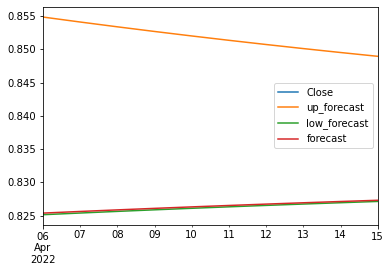

In [9]:
prediction.plot(model.df_wide_numeric,
                series=model.df_wide_numeric.columns[0],
                start_date="2022-04-06")

In [10]:
print(model)

Initiated AutoTS object with best model: 
NVAR
{'fillna': 'rolling_mean_24', 'transformations': {'0': 'ClipOutliers'}, 'transformation_params': {'0': {'method': 'clip', 'std_threshold': 3.5, 'fillna': None}}}
{'k': 2, 'ridge_param': 2e-06, 'warmup_pts': 1, 'seed_pts': 1, 'seed_weighted': None, 'batch_size': 5, 'batch_method': 'input_order'}
SMAPE: 1.949327682457548, 2.948810441609965, 3.276072130368928
MAE: 0.016383670163264287, 0.024089301864364688, 0.024967296483746237
SPL: 0.46867476399374397, 0.9935693409111797, 0.27155453093087717


In [14]:
# point forecasts dataframe
forecasts_df = prediction.forecast
# upper and lower forecasts
forecasts_up, forecasts_low = prediction.upper_forecast, prediction.lower_forecast

In [17]:
forecast_df

NameError: name 'forecast_df' is not defined

In [16]:
# accuracy of all tried model results
model_results = model.results()
# and aggregated from cross validation
validation_results = model.results("validation")

In [18]:
print(model_results)

                                    ID               Model  \
0     2887d2af24ace64615ccf0154ef2e4be   AverageValueNaive   
1     561cd23f17cd365db00c93067a1f03e1   AverageValueNaive   
2     da3c53c0617d9f838e7cfcf5e786e702   AverageValueNaive   
3     6e59470a65defcb534e8efbe45e93272  DatepartRegression   
4     443ccd989a33874b1e99a21b3e4123b4  DatepartRegression   
...                                ...                 ...   
1138  35d98b16771ce85a4ec6da994081db50  DatepartRegression   
1139  6e59470a65defcb534e8efbe45e93272  DatepartRegression   
1140  4c551c5230c5d5ad93eb53d3895e911d                 GLM   
1141  dea3999f971d483af3ecd609fb349734  DatepartRegression   
1142  30abed0319d9916d2bb6da8127ce4e7d  DatepartRegression   

                                        ModelParameters  \
0                                    {"method": "Mean"}   
1                                    {"method": "Mean"}   
2                                    {"method": "Mean"}   
3     {"regression_